In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import missingno as msno
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


from warnings import filterwarnings
filterwarnings("ignore")


# Loading in the data

In [2]:
drug = pd.read_csv("drug200.csv")
df = drug.copy()
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


# Data exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,200,NaN,NaN,NaN,44.315,16.5443,15,31,45,58,74
Sex,200,2,M,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BP,200,3,HIGH,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cholesterol,200,2,HIGH,103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Na_to_K,200,NaN,NaN,NaN,16.0845,7.22396,6.269,10.4455,13.9365,19.38,38.247
Drug,200,5,DrugY,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isnull().values.any()

False

In [6]:
df["Drug"].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [7]:
df.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

# Data processing 

## Label Encoding

In [8]:
encoder = LabelEncoder()
df["Sex"] = encoder.fit_transform(df["Sex"])
df["Cholesterol"] = encoder.fit_transform(df["Cholesterol"])

df["BP"] = df["BP"].map({"LOW":0, "NORMAL":1, "HIGH":2})

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,0,25.355,DrugY
1,47,1,0,0,13.093,drugC
2,47,1,0,0,10.114,drugC
3,28,0,1,0,7.798,drugX
4,61,0,0,0,18.043,DrugY


In [9]:
df["Drug"] = df['Drug'].str.lower()
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,0,25.355,drugy
1,47,1,0,0,13.093,drugc
2,47,1,0,0,10.114,drugc
3,28,0,1,0,7.798,drugx
4,61,0,0,0,18.043,drugy


In [10]:
corr = df.corr()
corr

,Age,Sex,BP,Cholesterol,Na_to_K
Age,1.000000,0.102027,-0.120918,-0.068234,-0.063119
Sex,0.102027,1.000000,-0.044952,-0.008811,-0.125008
BP,-0.120918,-0.044952,1.000000,0.032208,0.036871
Cholesterol,-0.068234,-0.008811,0.032208,1.000000,0.010000
Na_to_K,-0.063119,-0.125008,0.036871,0.010000,1.000000


In [11]:
df.groupby('Drug').mean()

,Age,Sex,BP,Cholesterol,Na_to_K
Drug,,,,,
druga,35.869565,0.608696,2.000000,0.478261,10.918783
drugb,62.500000,0.625000,2.000000,0.500000,11.524375
drugc,42.500000,0.562500,0.000000,0.000000,10.633750
drugx,44.018519,0.500000,0.666667,0.629630,10.650556
drugy,43.747253,0.483516,1.087912,0.483516,22.374780


# Data / Feature Visualization

<AxesSubplot:xlabel='Drug', ylabel='count'>

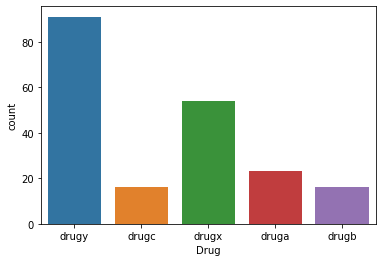

In [12]:
sbn.countplot(data = df, x = "Drug")

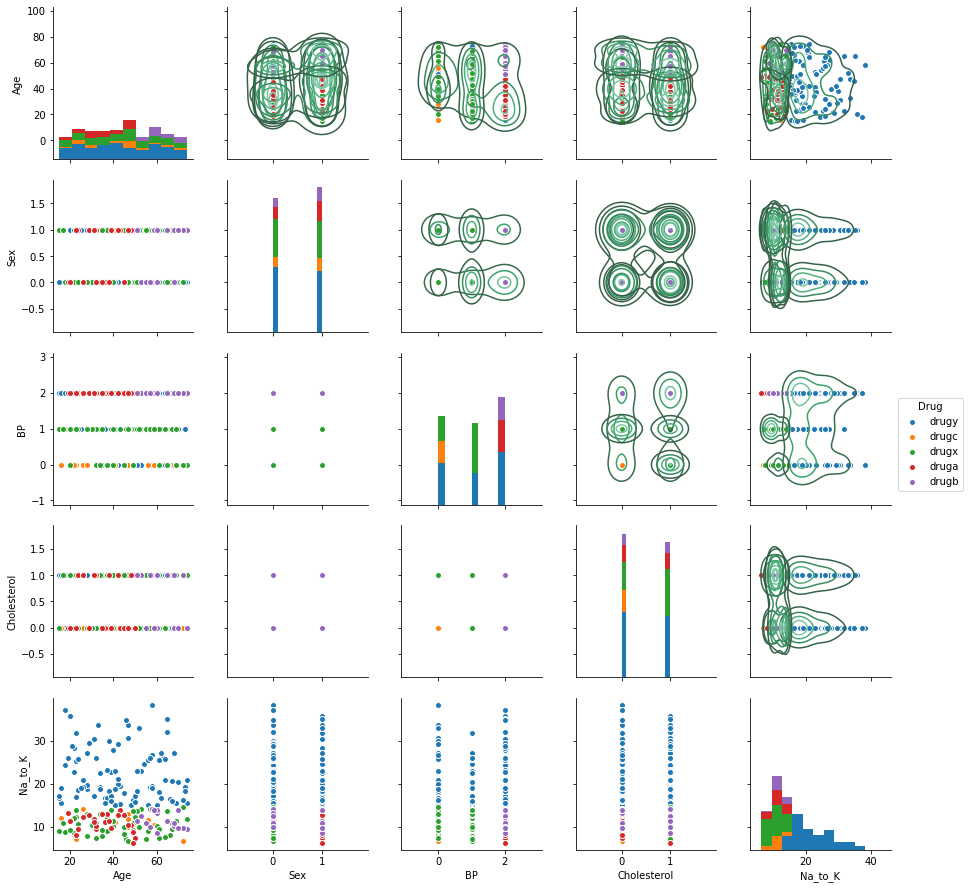

In [13]:
g = sbn.pairplot(df, hue= 'Drug')
g.map_upper(sbn.kdeplot, levels=4, color=".2")
plt.show()

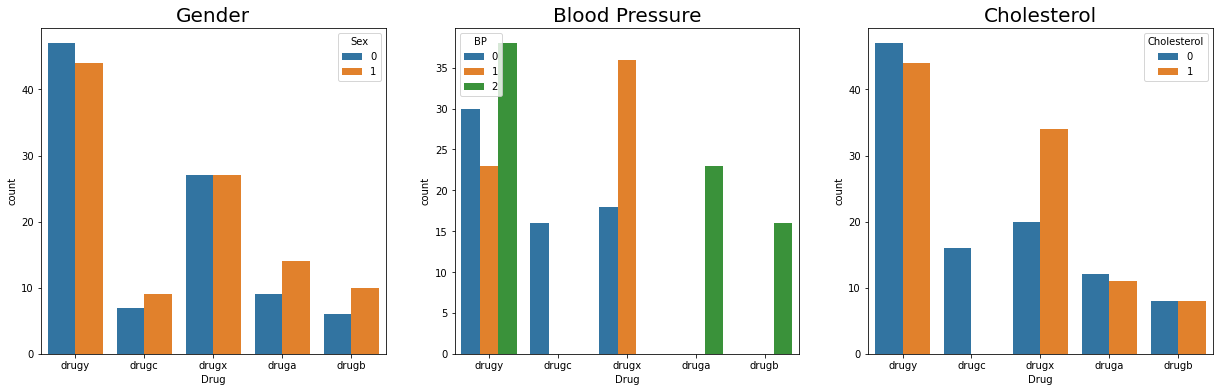

In [14]:
plt.figure(figsize=(21,6))

plt.subplot(1,3,1)
sbn.countplot(x='Drug',data=df, hue='Sex')
plt.title("Gender", size=20)


plt.subplot(1,3,2)
sbn.countplot(x='Drug',data=df, hue='BP')
plt.title("Blood Pressure", size=20)

plt.subplot(1,3,3)
sbn.countplot(x='Drug',data=df, hue='Cholesterol')
plt.title("Cholesterol", size=20)

plt.show()

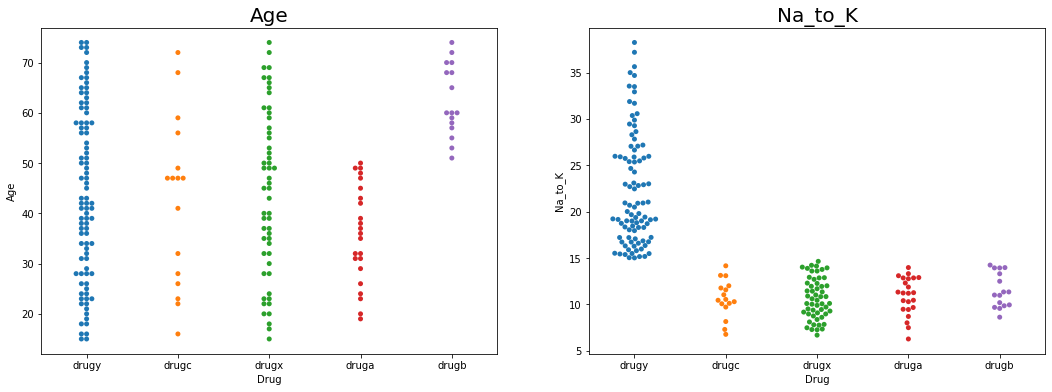

In [15]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sbn.swarmplot(x='Drug',y='Age', data=df)
plt.title("Age", size=20)


plt.subplot(1,2,2)
sbn.swarmplot(x='Drug',y='Na_to_K', data=df)
plt.title("Na_to_K", size=20)

plt.show()

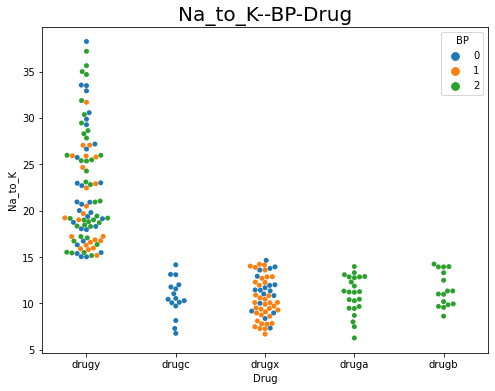

In [16]:
plt.figure(figsize=(8,6))

sbn.swarmplot(x='Drug',y='Na_to_K', hue='BP', data=df)
plt.title("Na_to_K--BP-Drug", size=20)

plt.show()

## Drug name encoding, x & y data split 

In [17]:
df["Drug"] = df["Drug"].map({"druga":0, "drugb":1, "drugc":2, "drugx":3, "drugy":4})

In [18]:
y = df["Drug"]
X = df.drop(["Drug"], axis= 1)

## Data scaling, creation of training / testing datasets

In [19]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)

# Model Creation

## Creating 9 different models and test them

In [21]:
models =[("Logistic Regression", LogisticRegression(max_iter=1000)),("SVC", SVC()),('KNN',KNeighborsClassifier(n_neighbors=10)),
         ("Decision Tree", DecisionTreeClassifier()),("Naive Bayes", GaussianNB()),
         ('Random Forest',RandomForestClassifier()), ('XGB', XGBClassifier()),
        ('Gradient Boost',GradientBoostingClassifier()), ('Neural Network', MLPClassifier())]

results = []
names = []
accuracies = []
finalResults = []

for name,model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = precision_score(y_test, y_pred,average='macro')
    accuracyScore = accuracy_score(y_test, y_pred)
    accuracies.append(accuracyScore)
    results.append(score)
    names.append(name)
    finalResults.append((name,score, accuracyScore))
    
finalResults_df = pd.DataFrame({'Model-Name': names, 'Accuracy-Score': accuracies, 'Precision-Score': results})
finalResults_df.sort_values(by='Accuracy-Score', ascending=False)

,Model-Name,Accuracy-Score,Precision-Score
3,Decision Tree,1.00,1.000000
6,XGB,0.98,0.987500
7,Gradient Boost,0.98,0.987500
5,Random Forest,0.96,0.976471
4,Naive Bayes,0.90,0.841429
0,Logistic Regression,0.88,0.900000
2,KNN,0.70,0.644762
1,SVC,0.66,0.270209
8,Neural Network,0.54,0.433333


## Diving deeper into the models with 100% accuracy (Deision Tree & Random Forest)

### Random Forest model 

In [22]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

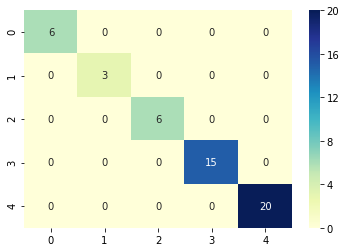

In [24]:
mat = confusion_matrix(y_test, y_pred)
p = sbn.heatmap(pd.DataFrame(mat), annot=True, cmap="YlGnBu" ,fmt='g')

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        20

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



Text(0.5, 0, 'Variables Importance Ratio')

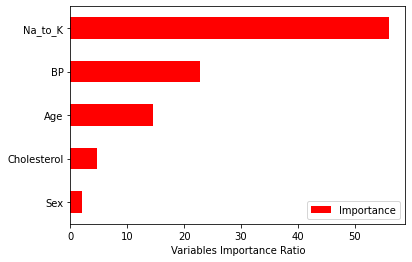

In [26]:
Importance = pd.DataFrame({"Importance": rf_model.feature_importances_*100},
                          index = X_train.columns)

Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind = "barh", color = "r")

plt.xlabel("Variables Importance Ratio")

### Decision Tree model

In [27]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)


In [28]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

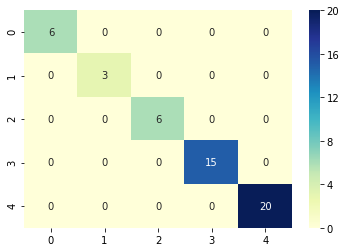

In [29]:
mat = confusion_matrix(y_test, y_pred)
p = sbn.heatmap(pd.DataFrame(mat), annot=True, cmap="YlGnBu" ,fmt='g')

In [30]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        20

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



# Both models perform with 100% accuracy and are suitable choices for this classification problem. Random Forest models tend to reduce bias and variance so this model may be better suited for this problem.